<a href="https://www.kaggle.com/code/swayamchaurasia/fraud-detection-with-custom-deep-network-augmented?scriptVersionId=266202959" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [2]:
df = pd.read_csv('/kaggle/input/augmented-data-of-insurance-fraud/augmented_dataset3.csv')

In [3]:
x3 = df.drop(['fraud_reported'], axis = 1)
y3 = df['fraud_reported']

print("Shape of x2 :", x3.shape)
print("Shape of y2 :", y3.shape)

Shape of x2 : (11542, 35)
Shape of y2 : (11542,)


In [4]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    #print(dataset[colname])
    return dataset
xnew=correlation(x3,0.9)
xnew.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,incident_month,incident_day
0,328,0.741477,0.737892,1000,1398.434792,0,466132,0.738661,0.736111,0.702703,...,1,2,0.770701,70767.759897,6772.716569,12543.629006,0.775000,2004,1,25
1,228,0.745161,0.737892,2000,1203.674562,5000000,468176,0.738661,0.736111,0.763441,...,0,0,0.744898,5459.638875,1452.343073,801.031626,0.661538,2007,1,21
2,134,0.741477,0.742120,2000,1437.621797,5000000,430632,0.765363,0.736000,0.723684,...,2,3,0.744898,36525.358832,7388.023573,3979.759710,0.750000,2007,2,22
3,256,0.772189,0.737892,2000,1399.249160,6000000,608117,0.765363,0.736000,0.753623,...,1,2,0.744898,63217.246358,6123.051226,6709.887572,0.723684,2014,1,10
4,228,0.772189,0.783333,1000,1540.957533,6000000,610706,0.738661,0.765517,0.723684,...,0,1,0.744898,6345.944308,549.585152,801.917359,0.808824,2009,2,17


In [5]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xnew,y3, test_size = 0.25, random_state = 42)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8656, 32)
Shape of x_test : (2886, 32)
Shape of y_train : (8656,)
Shape of y_test : (2886,)


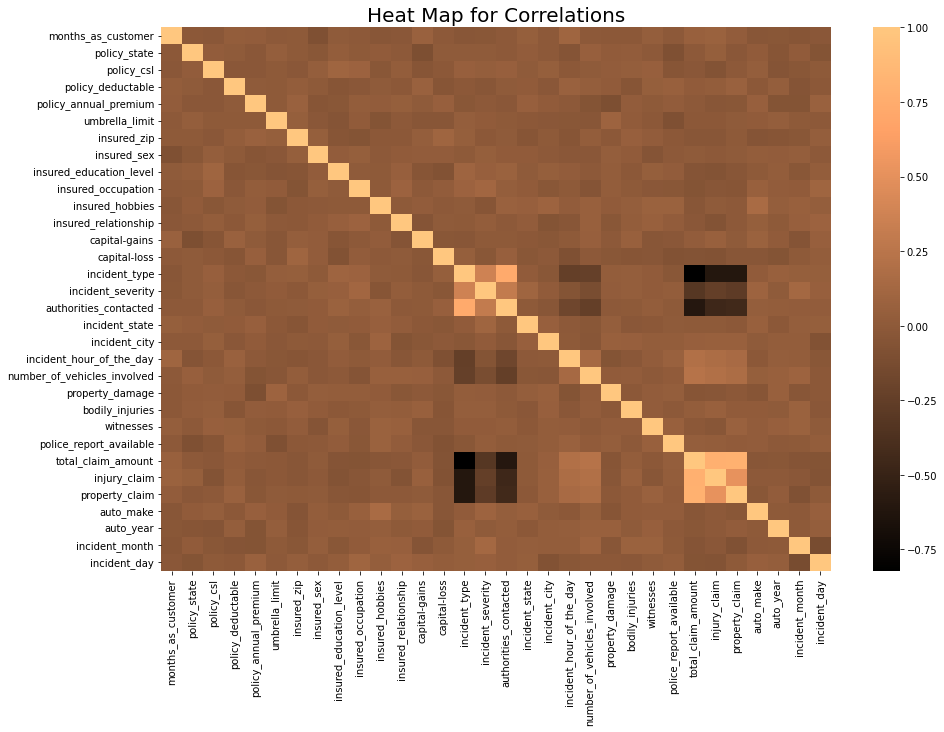

In [7]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [8]:
# Separate features and labels
X = df.drop(['fraud_reported'], axis=1)
y = df['fraud_reported']


In [9]:
# Define correlation function to remove highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]  # deleting the column from the dataset
    return dataset


In [10]:
# Feature scaling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Apply correlation threshold to remove correlated features *before* splitting
X_filtered = correlation(X.copy(), 0.9) # Apply to a copy to avoid modifying the original X

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Apply correlation threshold to remove correlated features
X_train = correlation(pd.DataFrame(X_train), 0.9)
X_test = correlation(pd.DataFrame(X_test), 0.9)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Model Building: Custom Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
253/253 [==============================] - 2s 5ms/step - loss: 0.4831 - accuracy: 0.7786 - val_loss: 0.3306 - val_accuracy: 0.8802
Epoch 2/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8619 - val_loss: 0.2781 - val_accuracy: 0.8955
Epoch 3/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3001 - accuracy: 0.8828 - val_loss: 0.2466 - val_accuracy: 0.9030
Epoch 4/100
253/253 [==============================] - 2s 6ms/step - loss: 0.2768 - accuracy: 0.8921 - val_loss: 0.2215 - val_accuracy: 0.9134
Epoch 5/100
253/253 [==============================] - 2s 6ms/step - loss: 0.2524 - accuracy: 0.9037 - val_loss: 0.1941 - val_accuracy: 0.9238
Epoch 6/100
253/253 [==============================] - 1s 5ms/step - loss: 0.2335 - accuracy: 0.9087 - val_loss: 0.1725 - val_accuracy: 0.9333
Epoch 7/100
253/253 [==============================] - 1s 5ms/step - loss: 0.2117 - accuracy: 0.9190 - val_loss: 0.1549 - val_accuracy: 0.9437

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

def check_fraud(input_data):
    # Ensure that the input data has exactly 32 features (same as the model's expected input)
    input_data = input_data[:32]  # Select the first 32 features

    # Input data should be preprocessed similarly (encoded and scaled)
    input_data_scaled = scaler.transform([input_data])
    
    # Model prediction (returns a value between 0 and 1)
    prediction = model.predict(input_data_scaled)

    # Interpret the prediction
    if prediction >= 0.5:
        print("Prediction: Fraud Detected")
    else:
        print("Prediction: Not Fraudulent")


109/109 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9994
Test Accuracy: 99.94%
Test Loss: 0.0035


In [14]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming model.predict(X_test) gives probability distributions for binary classification
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9994
Precision: 0.9989
Recall: 1.0000
F1 Score: 0.9994
